In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
BASE_PATH = "../data/02_EYODF Pilot Data/Pilot (Same Songs)"
OTREE_PATH = os.path.join(BASE_PATH, "all_participants_otree.csv")

NUMBER_OF_TRACKS = 41

In [4]:
emotion = (
    [f"Music_Discovery.{i}.player.arousal" for i in range(1, NUMBER_OF_TRACKS)]
    + [f"Music_Discovery.{i}.player.pleasure" for i in range(1, NUMBER_OF_TRACKS)]
)

In [5]:
preferences = [
    f"Music_Discovery.{i}.player.preference" for i in range(1, NUMBER_OF_TRACKS)
]

In [6]:
meta = pd.read_csv(OTREE_PATH)

In [7]:
emotions = meta[emotion + preferences]

In [8]:
e = emotions.reset_index().rename(columns={"index": "participant"}).melt(id_vars=["participant"])
e = e.assign(
    dimension=e.apply(lambda row: row["variable"].split(".")[-1], axis=1),
    track_id=e.apply(lambda row: row["variable"].split(".")[1], axis=1),
).drop(columns="variable")
display(e)
e = e.pivot(index=["participant", "track_id"], columns=["dimension"], values=["value"])
display(e)

,participant,value,dimension,track_id
0,0,3,arousal,1
1,1,3,arousal,1
2,2,3,arousal,1
3,3,3,arousal,1
4,4,1,arousal,1
...,...,...,...,...
955,3,5,preference,40
956,4,4,preference,40
957,5,2,preference,40
958,6,5,preference,40


value                    
dimension            arousal pleasure preference
participant track_id                            
0           1              3        4          5
            10             1        3          4
            11             2        3          4
            12             2        3          3
            13             4        4          2
...                      ...      ...        ...
7           5              2        3          3
            6              2        1          2
            7              1        3          4
            8              1        4          4
            9              1        4          5

[320 rows x 3 columns]

In [9]:
e.columns

MultiIndex([('value',    'arousal'),
            ('value',   'pleasure'),
            ('value', 'preference')],
           names=[None, 'dimension'])

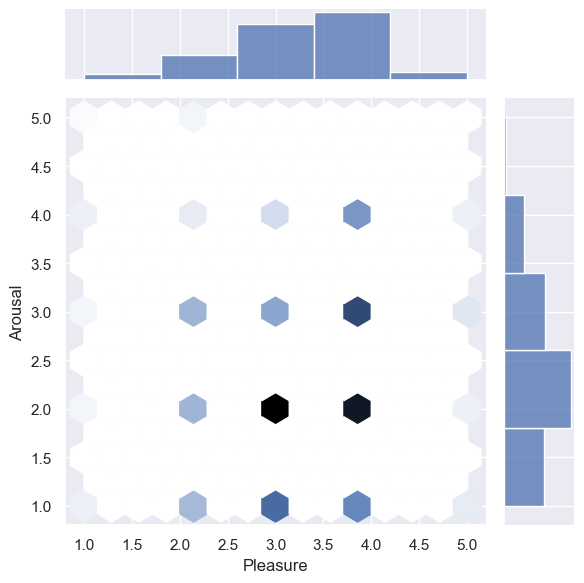

In [10]:
# Create a joint plot with marginal histograms
g = sns.jointplot(
    data=e, 
    x=("value", 'pleasure'),    
    y=("value", 'arousal'),
    #alpha=0.7, 
    kind="hex",
    marginal_kws=dict(bins=5)
)

# Adjust the plot aesthetics
g.set_axis_labels('Pleasure', 'Arousal')
g.fig.tight_layout()

# Show the plot
plt.show()


In [11]:

def rescale_likert_to_circumplex(likert_scores):
    return np.array([(score - 3) / 2 for score in likert_scores])

In [12]:
pleasure_circumplex = rescale_likert_to_circumplex(e[("value", "pleasure")])
arousal_circumplex = rescale_likert_to_circumplex(e[("value", "arousal")])

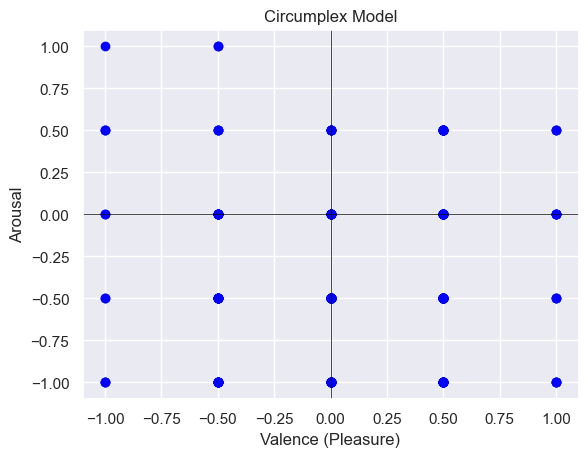

In [13]:
plt.scatter(pleasure_circumplex, arousal_circumplex, c='blue')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Circumplex Model')
plt.xlabel('Valence (Pleasure)')
plt.ylabel('Arousal')
plt.grid(True)
plt.show()

In [14]:
e

value                    
dimension            arousal pleasure preference
participant track_id                            
0           1              3        4          5
            10             1        3          4
            11             2        3          4
            12             2        3          3
            13             4        4          2
...                      ...      ...        ...
7           5              2        3          3
            6              2        1          2
            7              1        3          4
            8              1        4          4
            9              1        4          5

[320 rows x 3 columns]

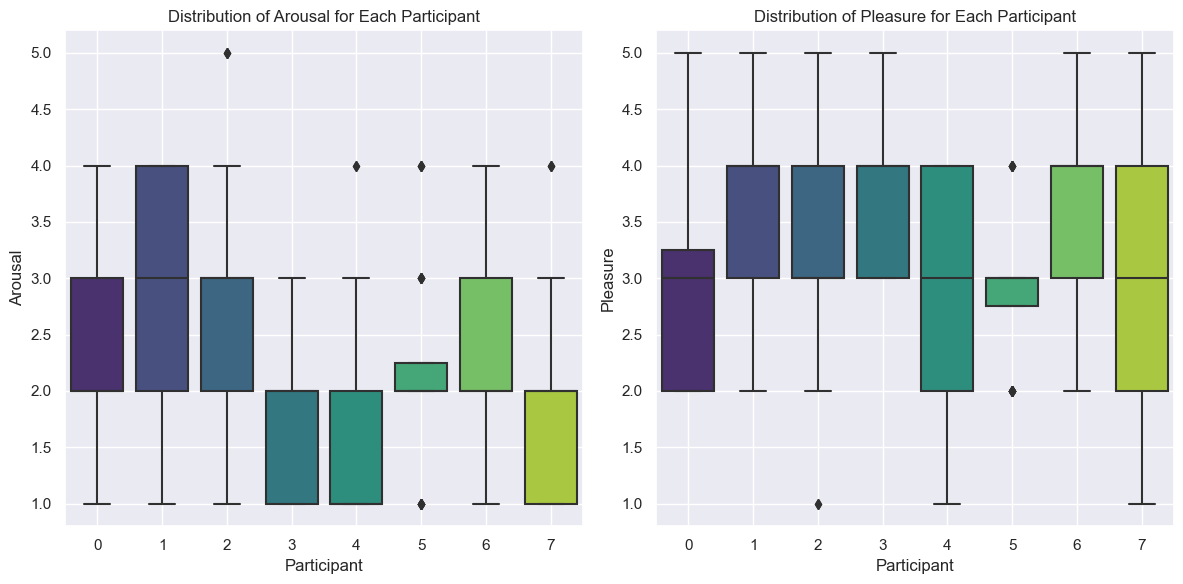

In [15]:
# Melting the DataFrame without resetting the index
df_melt = e.melt(value_vars=[('value', 'arousal'), ('value', 'pleasure')], 
                  ignore_index=False, 
                  var_name=['value', 'dimension'], 
                  value_name='score').reset_index()

# Create the boxplot
plt.figure(figsize=(12, 6))

# Plot boxplot for arousal
plt.subplot(1, 2, 1)
sns.boxplot(data=df_melt[df_melt['dimension'] == 'arousal'], x='participant', y='score', palette='viridis')
plt.title('Distribution of Arousal for Each Participant')
plt.xlabel('Participant')
plt.ylabel('Arousal')
plt.grid(True)

# Plot boxplot for pleasure
plt.subplot(1, 2, 2)
sns.boxplot(data=df_melt[df_melt['dimension'] == 'pleasure'], x='participant', y='score', palette='viridis')
plt.title('Distribution of Pleasure for Each Participant')
plt.xlabel('Participant')
plt.ylabel('Pleasure')
plt.grid(True)

plt.tight_layout()
plt.show()


In [16]:
for participant, group in df_melt.groupby("participant"):
    print(f"Participant: {participant}")
    group = group.assign(track_id=group.track_id.astype("int64"))
    for dimension in ['pleasure', 'arousal']:
        corr = group.loc[group['dimension'] == dimension].corr(numeric_only=True)
        corr_value = corr.loc['score', 'track_id']
        print(f"{dimension.capitalize()} correlation: {corr_value}")
    print("\n")

Participant: 0
Pleasure correlation: -0.1985130780360443
Arousal correlation: -0.13367895251829845


Participant: 1
Pleasure correlation: 0.05421980272158182
Arousal correlation: -0.027431012227375283


Participant: 2
Pleasure correlation: 0.29090028543341623
Arousal correlation: 0.07437024683093593


Participant: 3
Pleasure correlation: 0.09324346486093894
Arousal correlation: -0.5694755642284273


Participant: 4
Pleasure correlation: -0.10408572821686196
Arousal correlation: -0.15882096333554374


Participant: 5
Pleasure correlation: 0.21154556813351327
Arousal correlation: 0.09648804291390738


Participant: 6
Pleasure correlation: -0.005186379470556579
Arousal correlation: 0.111227416501116


Participant: 7
Pleasure correlation: 0.01702348306828581
Arousal correlation: 0.35892422337943786




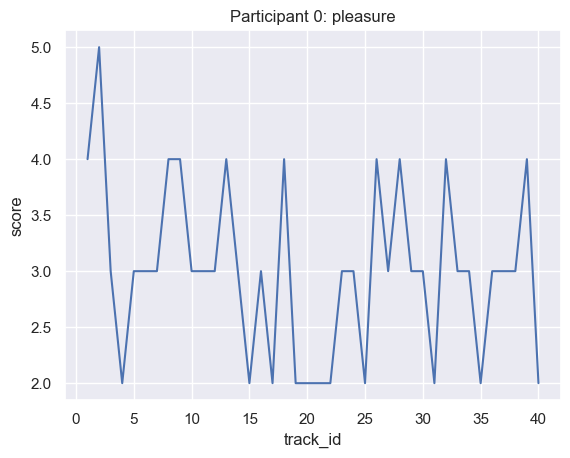

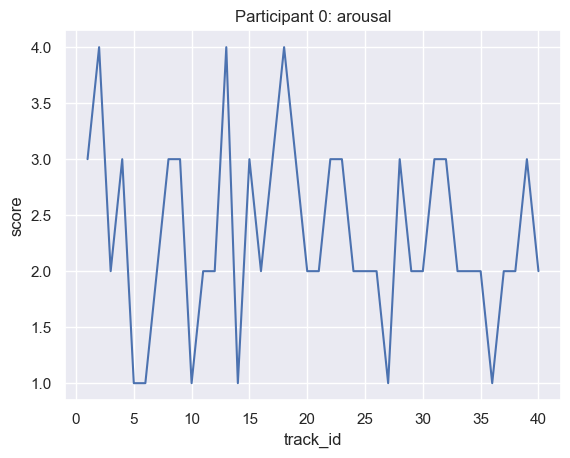

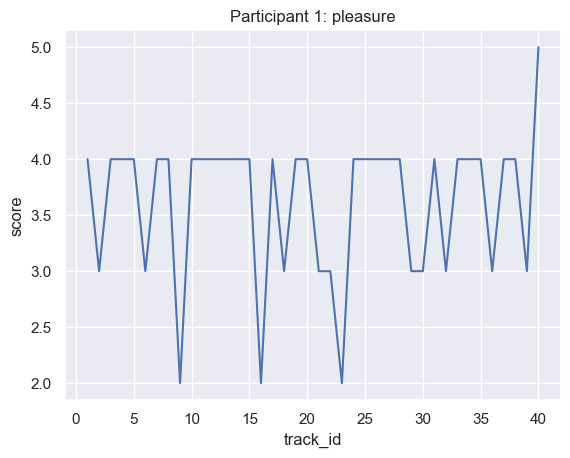

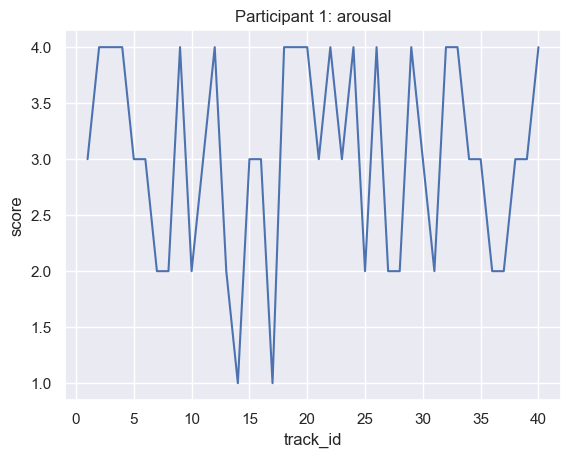

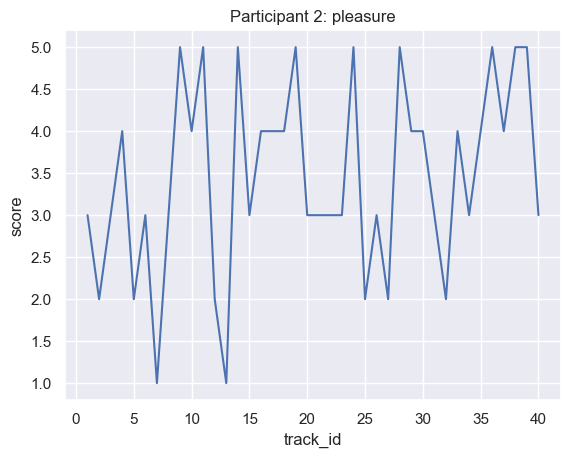

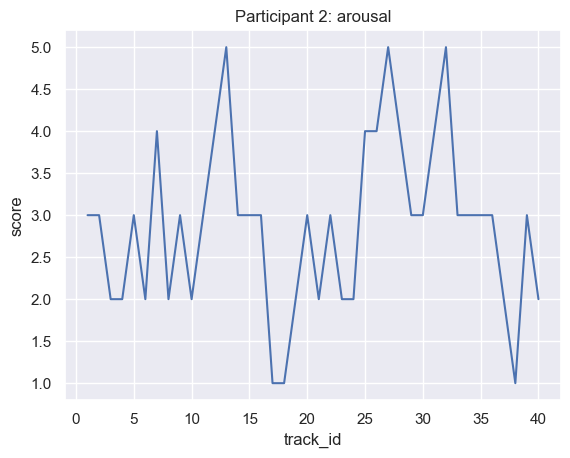

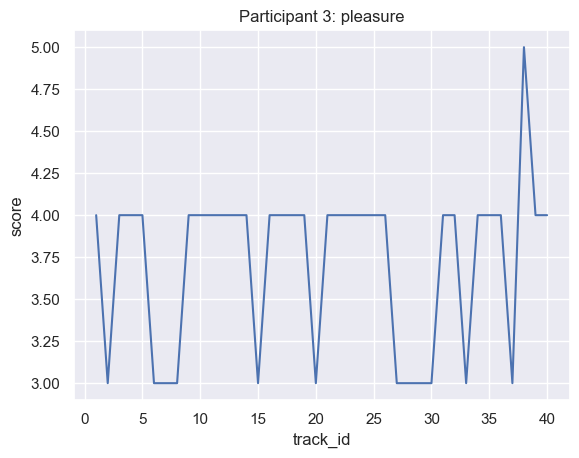

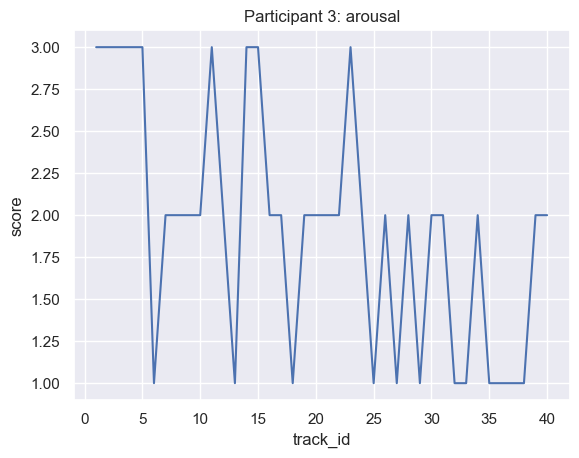

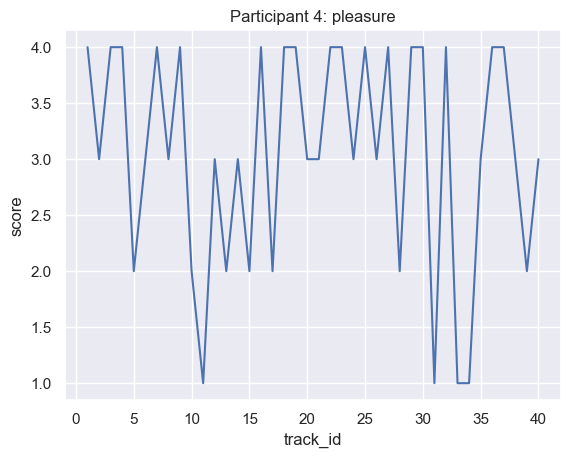

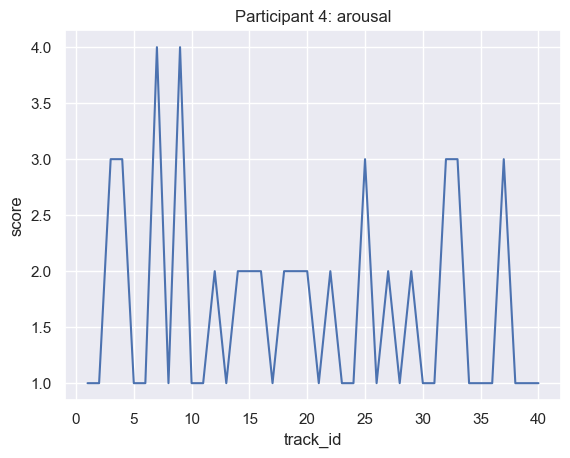

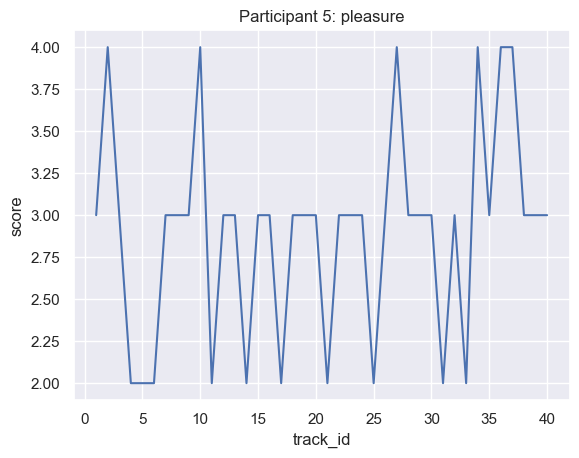

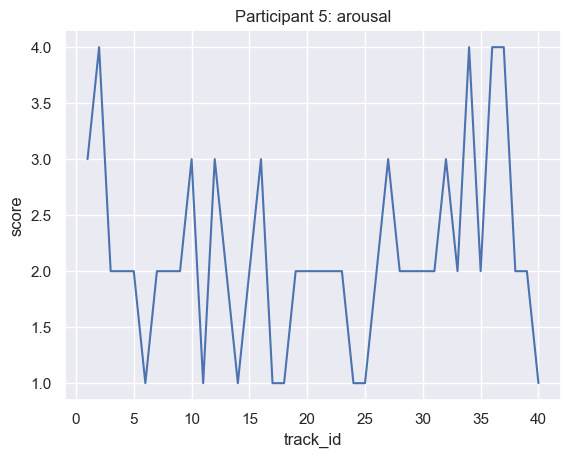

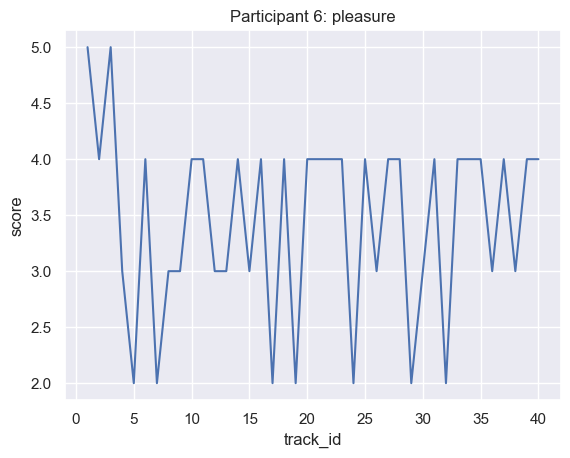

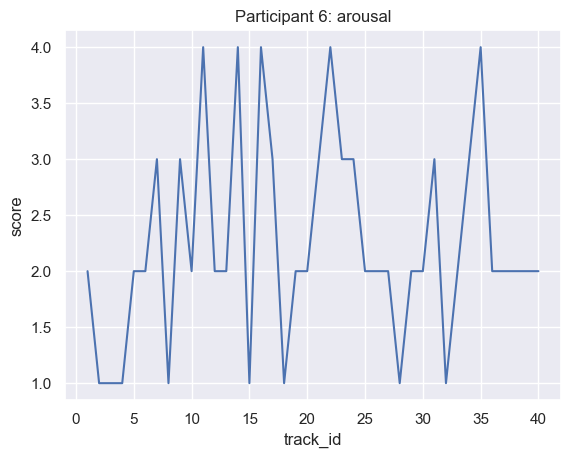

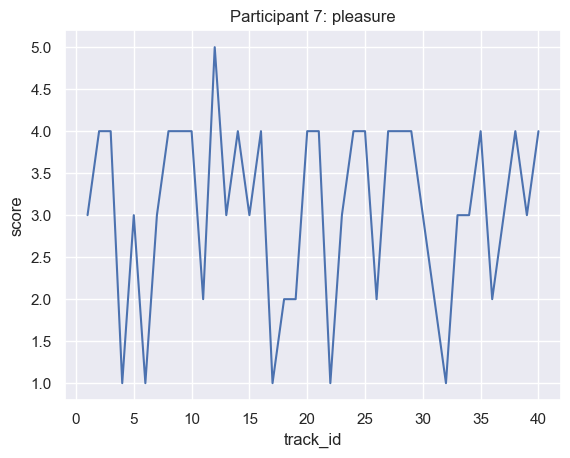

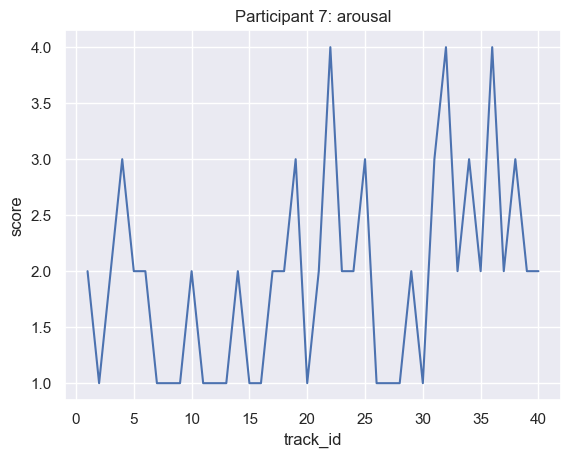

In [17]:
for participant, group in df_melt.groupby("participant"):
    group = group.assign(track_id=group.track_id.astype("int64"))
    for dimension in ['pleasure', 'arousal']:
        dim = group.loc[group['dimension'] == dimension]
        sns.lineplot(dim, x="track_id", y="score")
        plt.title(f"Participant {participant}: {dimension}")
        plt.show()

In [18]:
# check if z-norm by participant changes how distribution looks in general

In [19]:
df = e.copy()

normalized_df = df.groupby(level='participant', group_keys=False).apply(lambda x: (x - x.mean()) / x.std())


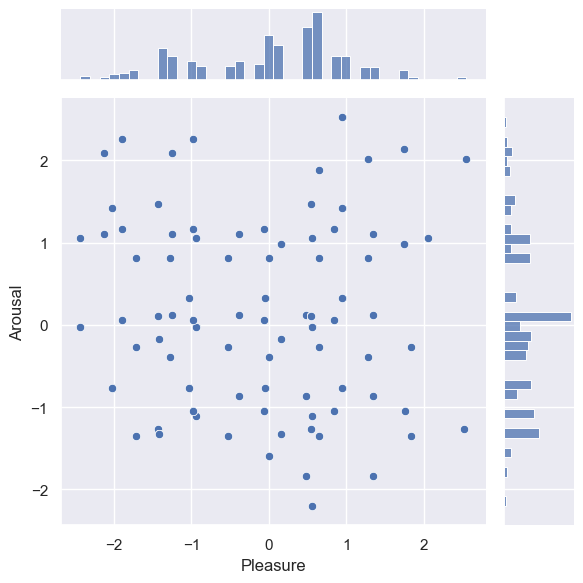

In [20]:
# Create a joint plot with marginal histograms
g = sns.jointplot(
    data=normalized_df, 
    x=("value", 'pleasure'),    
    y=("value", 'arousal'),
    #alpha=0.7, 
    kind="scatter",
    marginal_kws=dict(bins=40)
)

# Adjust the plot aesthetics
g.set_axis_labels('Pleasure', 'Arousal')
g.fig.tight_layout()

# Show the plot
plt.show()


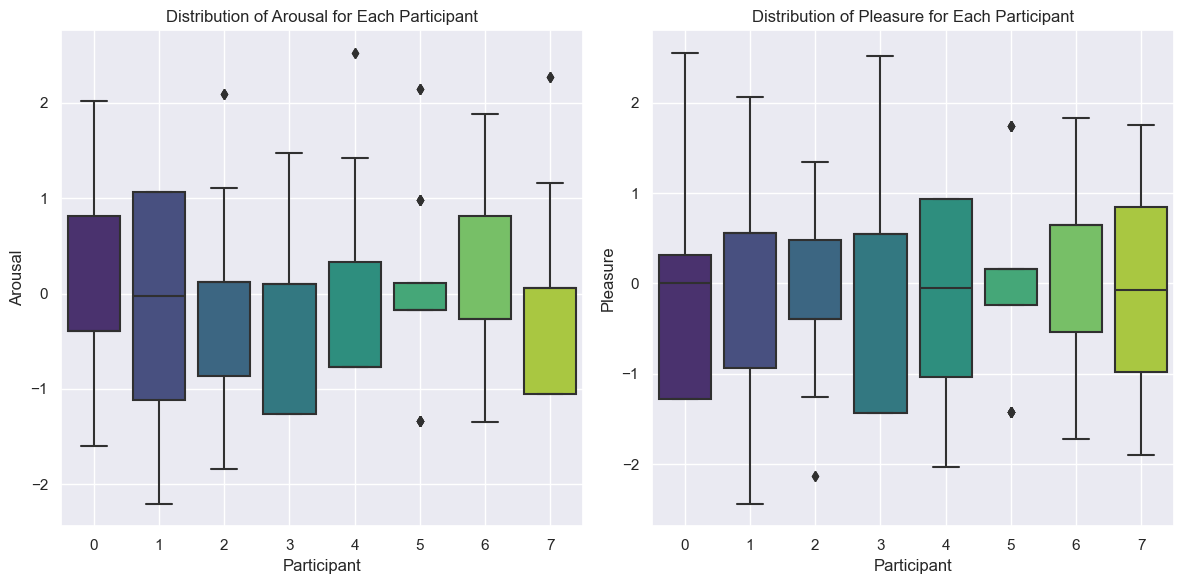

In [21]:
# Melting the DataFrame without resetting the index
df_melt_norm = normalized_df.melt(value_vars=[('value', 'arousal'), ('value', 'pleasure'), ('value', 'preference')], 
                  ignore_index=False, 
                  var_name=['value', 'dimension'], 
                  value_name='score').reset_index()

# Create the boxplot
plt.figure(figsize=(12, 6))

# Plot boxplot for arousal
plt.subplot(1, 2, 1)
sns.boxplot(data=df_melt_norm[df_melt_norm['dimension'] == 'arousal'], x='participant', y='score', palette='viridis')
plt.title('Distribution of Arousal for Each Participant')
plt.xlabel('Participant')
plt.ylabel('Arousal')
plt.grid(True)

# Plot boxplot for pleasure
plt.subplot(1, 2, 2)
sns.boxplot(data=df_melt_norm[df_melt_norm['dimension'] == 'pleasure'], x='participant', y='score', palette='viridis')
plt.title('Distribution of Pleasure for Each Participant')
plt.xlabel('Participant')
plt.ylabel('Pleasure')
plt.grid(True)

plt.tight_layout()
plt.show()


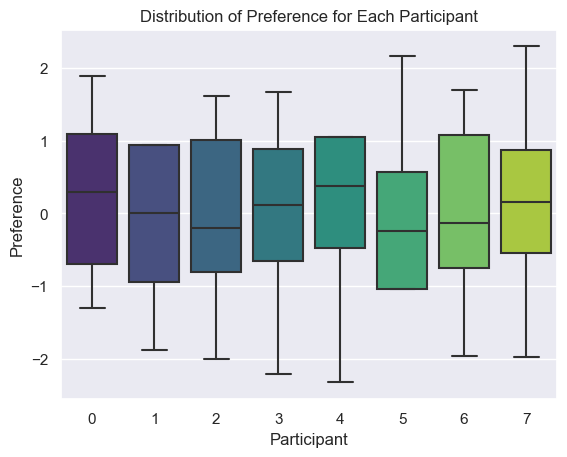

In [22]:
sns.boxplot(data=df_melt_norm[df_melt_norm['dimension'] == 'preference'], x='participant', y='score', palette='viridis')
plt.title('Distribution of Preference for Each Participant')
plt.xlabel('Participant')
plt.ylabel('Preference')
plt.show()


In [23]:
(df_melt_norm
    .groupby("participant", group_keys=False)
    .apply(
        lambda group: group.pivot(
            index="track_id", 
            columns="dimension",
            values="score"
        )
    )
    .corr()
)

dimension,arousal,pleasure,preference
dimension,,,
arousal,1.000000,0.058355,0.033203
pleasure,0.058355,1.000000,0.730831
preference,0.033203,0.730831,1.000000


In [24]:
e_norm = df_melt_norm.pivot(
    index=["participant", "track_id"],
    columns="dimension",
    values="score"
)

<Axes: xlabel='pleasure', ylabel='arousal'>

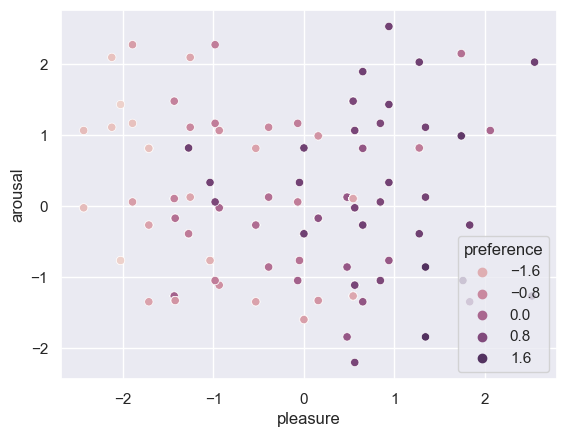

In [25]:
sns.scatterplot(e_norm, x="pleasure", y="arousal", hue="preference")

In [26]:
from sklearn.cluster import KMeans

In [27]:
e_norm = e_norm.assign(
    cls=KMeans(n_clusters=6).fit_predict(
        e_norm[["pleasure", "arousal"]]
    )
)

<Axes: xlabel='pleasure', ylabel='arousal'>

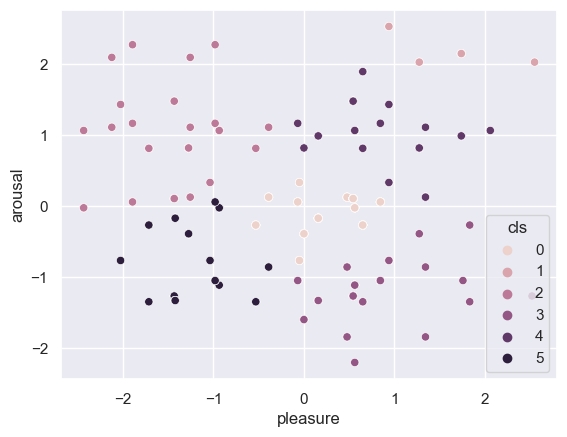

In [28]:
sns.scatterplot(e_norm, x="pleasure", y="arousal", hue="cls")

Looks like kmeans with 6 groups leads to an okay emotion dist. Maybe this can be used as a single class multi-label cls instead of prediciting arousal and pleasure separately.

In [29]:
e_norm[["cls", "preference"]].corr()

dimension,cls,preference
dimension,,
cls,1.000000,-0.074954
preference,-0.074954,1.000000


In [30]:
class_experiments = {}

# remove randomness in choice of init in kmeans
for _ in range(10000):
    for n_class in range(2, 11):
        e_check_norm = e_norm.assign(
            cls=KMeans(n_clusters=n_class).fit_predict(
                e_norm[["pleasure", "arousal"]]
            )
        )
        correlation = e_check_norm[["cls", "preference"]].corr().iloc[0, 1]
        #print(f"{n_class} -> {correlation}")
        if class_experiments.get(n_class):
            class_experiments[n_class].append(correlation)
        else:
            class_experiments[n_class] = [correlation]

In [31]:
tt = np.ones(len(class_experiments) + 2) * np.inf

for k in class_experiments.keys():
    tt[k] = np.array(class_experiments[k]).mean()

print(tt)
# all correlations in tt need to be negative for this to work
print(f"Use {tt.argmin()} classes")



[        inf         inf -0.03428405 -0.05429537 -0.04338747 -0.03877227
 -0.0432453  -0.03175097 -0.0246716  -0.02422134 -0.02698348]
Use 3 classes


In [32]:
e_norm = e_norm.assign(
    cls=KMeans(n_clusters=3).fit_predict(
        e_norm[["pleasure", "arousal"]]
    )
)

<Axes: xlabel='pleasure', ylabel='arousal'>

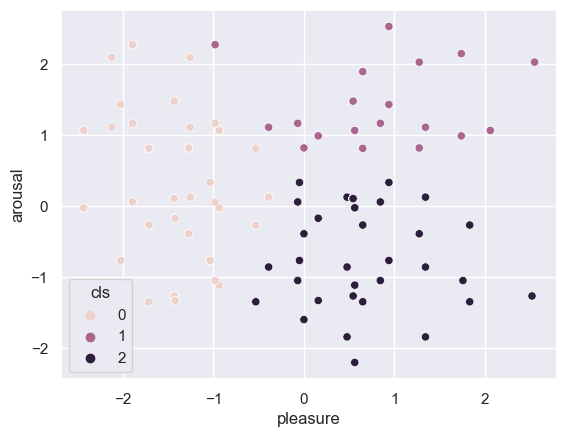

In [33]:
sns.scatterplot(e_norm, x="pleasure", y="arousal", hue="cls")

In [34]:
e_norm[["cls", "preference"]].corr()

dimension,cls,preference
dimension,,
cls,1.000000,0.492384
preference,0.492384,1.000000
